# Heart Murmur Analysis
An exploration of patient data related to heart murmurs.

## Introduction
This notebook provides a detailed analysis of a dataset containing medical evaluations of pediatric patients, particularly focusing on heart murmurs and related characteristics.

In [2]:
import pandas as pd
data = pd.read_csv('training_data.csv')
data.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


## Data Exploration
Displaying the initial few rows and basic statistics of the dataset.

In [3]:
data.describe(include='all')

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
count,942.000000,942,868,942,826.000000,837.000000,942,942,179,179,...,178,178,5,5,5,5,5,942,942,140.000000
unique,NaN,28,4,2,NaN,NaN,2,3,17,4,...,3,3,1,1,3,3,2,2,2,NaN
top,NaN,AV+PV+TV+MV,Child,Female,NaN,NaN,False,Absent,AV+MV+PV+TV,PV,...,Low,Harsh,Early-diastolic,Decrescendo,I/IV,Low,Blowing,Normal,CC2015,NaN
freq,NaN,586,664,486,NaN,NaN,872,695,70,62,...,87,96,5,5,3,2,4,486,557,NaN
mean,66624.319533,NaN,NaN,NaN,110.800242,23.632756,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58208.735714
std,16966.858912,NaN,NaN,NaN,30.000607,15.453337,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10216.094378
min,2530.000000,NaN,NaN,NaN,35.000000,2.300000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23625.000000
25%,50263.250000,NaN,NaN,NaN,89.000000,12.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50092.000000
50%,68452.500000,NaN,NaN,NaN,115.000000,20.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50661.500000
75%,84938.500000,NaN,NaN,NaN,133.000000,31.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68466.250000


## Distribution Analysis
Exploring the distribution of key features such as age, sex, murmur presence, and outcomes.

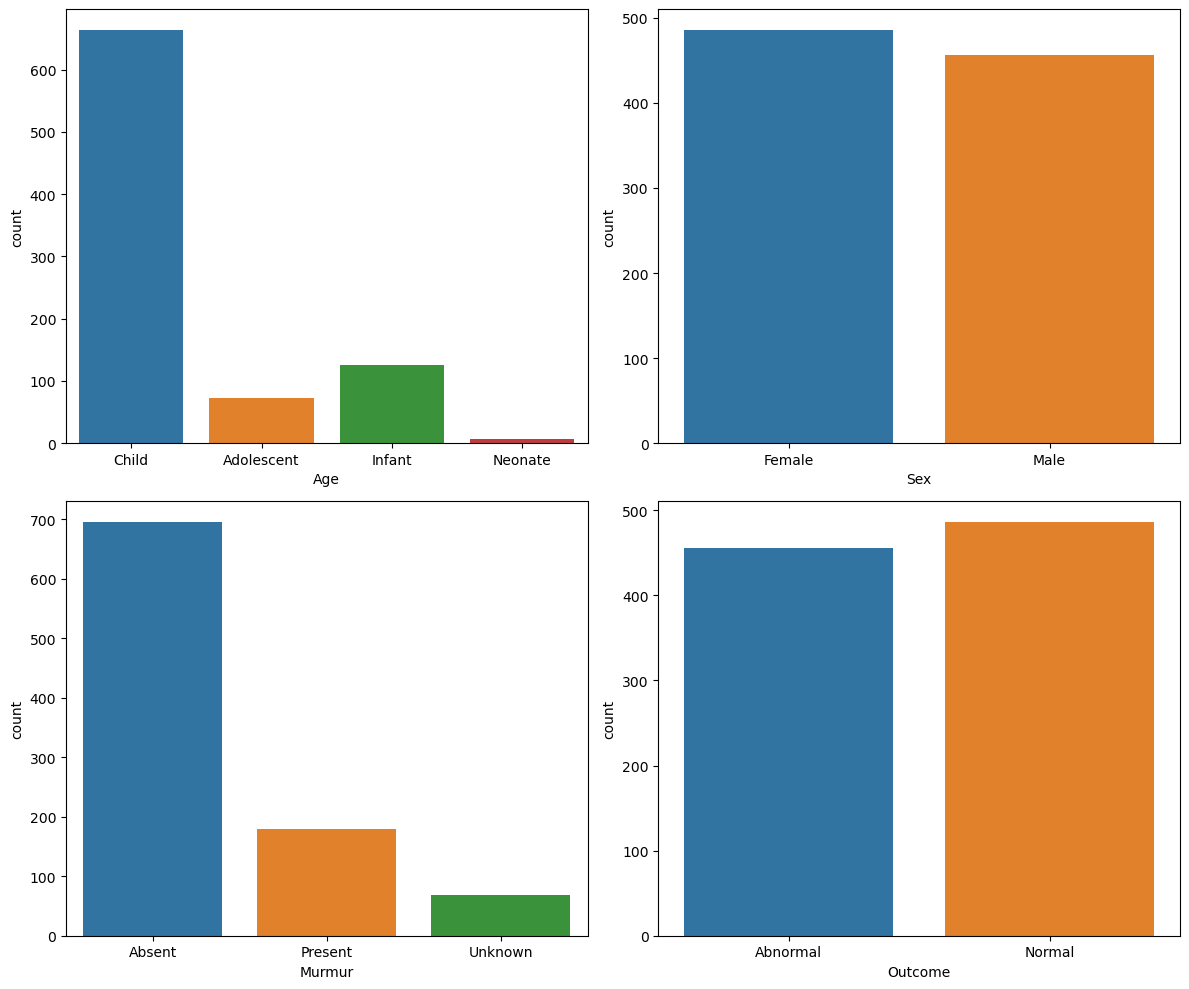

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting distributions of age, sex, murmur presence, and outcomes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.countplot(data=data, x='Age', ax=axes[0, 0])
sns.countplot(data=data, x='Sex', ax=axes[0, 1])
sns.countplot(data=data, x='Murmur', ax=axes[1, 0])
sns.countplot(data=data, x='Outcome', ax=axes[1, 1])
plt.tight_layout()

## Correlation Analysis
Investigating the relationships between numerical attributes and health outcomes.

In [5]:
correlation_data = data[['Height', 'Weight', 'Sex', 'Outcome']].copy()
correlation_data['Sex'] = correlation_data['Sex'].astype('category').cat.codes
correlation_data['Outcome'] = correlation_data['Outcome'].astype('category').cat.codes
correlation_data.corr()

,Height,Weight,Sex,Outcome
Height,1.000000,0.853902,0.075437,0.092609
Weight,0.853902,1.000000,0.104180,0.065643
Sex,0.075437,0.104180,1.000000,-0.018112
Outcome,0.092609,0.065643,-0.018112,1.000000


## Murmur Location Analysis
Analyzing how different murmur locations correlate with health outcomes.

In [6]:
murmur_location_outcome = data.groupby(['Murmur locations', 'Outcome']).size().unstack(fill_value=0)
murmur_location_outcome

Outcome,Abnormal,Normal
Murmur locations,,
AV,2,0
AV+MV,16,3
AV+MV+PV,2,0
AV+MV+PV+Phc+TV,1,0
AV+MV+PV+TV,63,7
AV+MV+TV,1,0
AV+PV,3,3
AV+PV+TV,5,1
AV+TV,0,1


## Murmur Characteristics Analysis
Further exploration of murmur characteristics such as pitch and quality.

<Axes: xlabel='Systolic murmur quality', ylabel='count'>

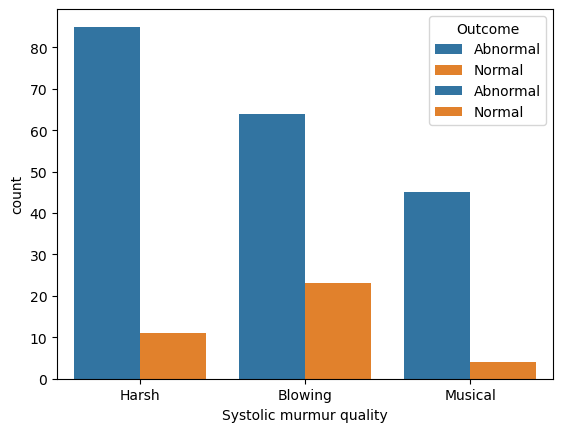

In [7]:
sns.countplot(data=data, x='Systolic murmur pitch', hue='Outcome')
sns.countplot(data=data, x='Systolic murmur quality', hue='Outcome')


# Heart Murmur Classification Using CNN

## Dataset Preparation
Import necessary libraries and define the `PhonocardiogramDataset` class for handling phonocardiogram data.

```python
import numpy as np
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

class PhonocardiogramDataset(Dataset):
    def __init__(self, file_paths, labels, sr=4000, window_size=256, hop_length=128):
        self.file_paths = file_paths
        self.labels = labels
        self.sr = sr
        self.window_size = window_size
        self.hop_length = hop_length

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        audio, _ = librosa.load(self.file_paths[idx], sr=self.sr)
        spectrogram = np.abs(librosa.stft(audio, n_fft=self.window_size, hop_length=self.hop_length))
        mean = np.mean(spectrogram, axis=1, keepdims=True)
        std = np.std(spectrogram, axis=1, keepdims=True)
        normalized_spectrogram = (spectrogram - mean) / std
        tensor_spectrogram = torch.tensor(normalized_spectrogram, dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return tensor_spectrogram, label
```

## CNN Model Definition
Define the CNN architecture for analyzing heart murmurs.

```python
import torch.nn as nn
import torch.nn.functional as F

class HeartMurmurCNN(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(HeartMurmurCNN, self).__init__()
        # Define layers...
        self.fc1 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Forward pass definition...
        return out
```

## Training Setup
Prepare data loaders, define optimizer and loss function.

```python
file_paths = ['path_to_file1.wav', 'path_to_file2.wav', 'path_to_file3.wav']
labels = [0, 1, 0]
dataset = PhonocardiogramDataset(file_paths, labels)
train_size = int(0.8 * len(dataset))
validation_size = len(dataset) - train_size
train_dataset, validation_dataset = random_split(dataset, [train_size, validation_size])
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=16, shuffle=False)

model = HeartMurmurCNN(input_channels=1, num_classes=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()
```

## Training and Validation Functions
Define functions for training and validating the model.

```python
def train_model(model, train_loader, optimizer, criterion):
    # Training logic...
    return running_loss / len(train_loader)

def validate_model(model, validation_loader, criterion):
    # Validation logic...
    return running_loss / len(validation_loader)
```

## Model Training
Run training and validation cycles.

```python
for epoch in range(10):
    train_loss = train_model(model, train_loader, optimizer, criterion)
    validation_loss = validate_model(model, validation_loader, criterion)
```
